## REPORT

**Desription::**

- Participant 1 (pp1) performed training 1 block and delay 1 block (from choice to appearance of intermediate stimulus).
    - Participant 1 is treated with CONTINGENT condition
    
- Participant 2 (pp2) performed training 1 block, delay 1 block and delay 2 (from stimulus directed action to appearance    of outcome) block.
    - Participant 2 was treated with INCONTINGENT condition.
    
**Genral Observation::**

- Duration for one trial on main task is around 10 seconds.
- Participant 2 in delay 1 block reported that in the starting few trials, reported the time taken for the outcome to appear instead of time taken for intermediate stimulus to appear. But the analysis herein is not accounted for those illegal data points.

**Notes::**

- Due to lack of time participant 1 was not recorded for training 2 and delay 2 blocks. The delay 1 block was also not completely recorded. 180 trials were recorded instead of 360 trials. 

- Taking lessons from recording of participant 1, I had reduced the number of trials for participant 2 so atleast main blocks could be recorded. Even taking this measure training 2 could not be recorded due to lack of time. Participant 2 performed the experiment in 1 hour 40 minutes(approx)

- With the reduced number of trials taking all 4 blocks into account the estimate experiment runtime can reach around 2 hours.
    

In [93]:
cd F:\msc_thesis

F:\msc_thesis


In [94]:
#import packages
import os 
import numpy as np
import pandas as pd
%matplotlib inline
from scipy import stats
import seaborn as sns

#import data to this script/program/notebook
DIR=os.path.dirname(os.path.abspath('__file__'))

DATADIR=os.path.join(DIR,'Pilot')

pp1train1data=os.path.join(DATADIR,'1_T1.tsv')
pp1delay1data=os.path.join(DATADIR,'1_D1.tsv')
pp2train1data=os.path.join(DATADIR,'2_T1.tsv')
pp2delay1data=os.path.join(DATADIR,'2_D1.tsv')
pp2delay2data=os.path.join(DATADIR,'2_D2.tsv')

#store all data in dataframe variables 
pp1train1,pp1delay1=pd.read_table(pp1train1data),pd.read_table(pp1delay1data,skipfooter=1)

pp2train1,pp2delay1,pp2delay2=pd.read_table(pp2train1data),pd.read_table(pp2delay1data,skipfooter=1),\
pd.read_table(pp2delay2data,skipfooter=10)

F:\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:21: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
F:\Anaconda2\envs\python3\lib\site-packages\ipykernel_launcher.py:23: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.


In [95]:
# "Removing illegal trials based on the performance in the trial"

pp1train1=pp1train1[pp1train1['valid'] == 1]
pp2train1=pp2train1[pp2train1['valid'] == 1]

pp1delay1=pp1delay1[(pp1delay1['trialvalid']==1) & (pp1delay1['actionvalid']==1)]

pp2delay1=pp2delay1[(pp2delay1['trialvalid']==1) & (pp2delay1['actionvalid']==1)]
pp2delay2=pp2delay2[(pp2delay2['trialvalid']==1) & (pp2delay2['actionvalid']==1)]

In [96]:
# "Selecting only the relevant data fields for analysis that is for time perception"

pp1train1=pp1train1[['SOA','estimate']]
pp2train1=pp2train1[['SOA','estimate']]

pp1delay1=pp1delay1[['SOA','intention','estimate']]

pp2delay1=pp2delay1[['SOA','intention','estimate']]
pp2delay2=pp2delay2[['SOA','intention','estimate']]

## analysis of participant 1 data (contingent condition)

In [97]:
print ("linear regression of participant 1's training 1")
stats.linregress(pp1train1)

linear regression of participant 1's training 1


LinregressResult(slope=0.23556702127659571, intercept=305.25755319148936, rvalue=0.23275530608519504, pvalue=0.010854542474174316, stderr=0.090997058997059774)

plot of training 1 of participant 1


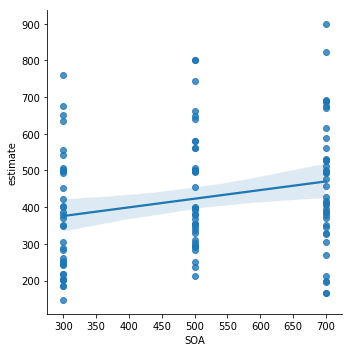

In [98]:
print ('plot of training 1 of participant 1')
Gpp1train1 = sns.lmplot(x="SOA", y="estimate",truncate=True, size=5, data=pp1train1) 

In [99]:
pp1delay1I=pp1delay1[pp1delay1['intention']==1]
pp1delay1U=pp1delay1[pp1delay1['intention']==0]

In [100]:
print ("linear regression of participant 1's delay 1 having Intended Outcomes")
stats.linregress(x=pp1delay1I['SOA'],y=pp1delay1I['estimate'])

linear regression of participant 1's delay 1 having Intended Outcomes


LinregressResult(slope=0.014097627623897685, intercept=498.02769842255617, rvalue=0.018251161355783183, pvalue=0.85128415844107996, stderr=0.075011914986218314)

In [101]:
print ("linear regression of participant 1's delay 1 having Unintended Outcomes")
stats.linregress(x=pp1delay1U['SOA'],y=pp1delay1U['estimate'])

linear regression of participant 1's delay 1 having Unintended Outcomes


LinregressResult(slope=0.16317164179104471, intercept=391.07089552238813, rvalue=0.20830739211761332, pvalue=0.29709996323145965, stderr=0.15322760317189138)

plot of delay 1 of participant 1 (contingent condition)
intended outcome=1
unintended outcome=0


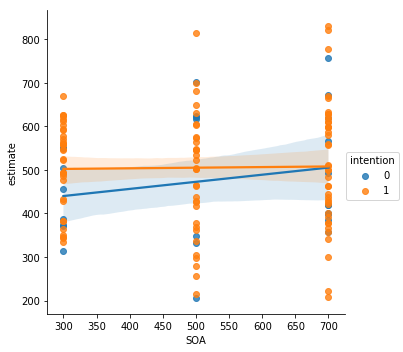

In [102]:
print ('plot of delay 1 of participant 1 (contingent condition)\nintended outcome=1\nunintended outcome=0')
Gpp1delay1=sns.lmplot(x="SOA", y="estimate", hue="intention",truncate=True, size=5, data=pp1delay1)

## analysis of participant 2 data (incontingent condition)

In [103]:
print ("linear regression of participant 2's training 1")
stats.linregress(pp2train1)

linear regression of participant 2's training 1


LinregressResult(slope=1.4112535953978909, intercept=-310.36313518696079, rvalue=0.86555808005166168, pvalue=1.5151434227081639e-17, stderr=0.11216120121929771)

plot of training 1 of participant 2


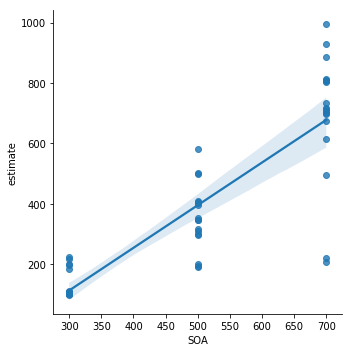

In [104]:
print ('plot of training 1 of participant 2')
Gpp2train1 = sns.lmplot(x="SOA", y="estimate",truncate=True, size=5, data=pp2train1)

In [105]:
pp2delay1I=pp2delay1[pp2delay1['intention']==1]
pp2delay1U=pp2delay1[pp2delay1['intention']==0]

pp2delay2I=pp2delay2[pp2delay2['intention']==1]
pp2delay2U=pp2delay2[pp2delay2['intention']==0]

In [106]:
print ("linear regression of participant 2's delay 1 having Intentded Outcomes")
stats.linregress(x=pp2delay1I['SOA'],y=pp2delay1I['estimate'])

linear regression of participant 2's delay 1 having Intentded Outcomes


LinregressResult(slope=0.7041706161137441, intercept=-0.189573459715632, rvalue=0.61757056857186543, pvalue=2.1837831248749305e-05, stderr=0.1454811688797063)

In [107]:
print ("linear regression of participant 2's delay 1 having Unintentded Outcomes")
stats.linregress(x=pp2delay1U['SOA'],y=pp2delay1U['estimate'])

linear regression of participant 2's delay 1 having Unintentded Outcomes


LinregressResult(slope=0.80226953907815657, intercept=-54.879258517034202, rvalue=0.71665613291461128, pvalue=6.0733627380528192e-07, stderr=0.1319696370329056)

plot of delay 1 of participant 2 (incontingent condition)
intended outcome=1
unintended outcome=0


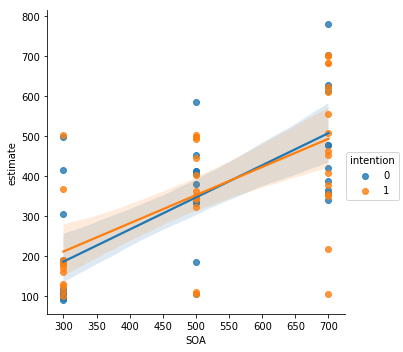

In [108]:
print ('plot of delay 1 of participant 2 (incontingent condition)\nintended outcome=1\nunintended outcome=0')
Gpp2delay1=sns.lmplot(x="SOA", y="estimate", hue="intention",truncate=True, size=5, data=pp2delay1)

In [109]:
print ("linear regression of participant 2's delay 2 having Intentded Outcomes")
stats.linregress(x=pp2delay2I['SOA'],y=pp2delay2I['estimate'])

linear regression of participant 2's delay 2 having Intentded Outcomes


LinregressResult(slope=1.3102284482758619, intercept=-191.88060344827574, rvalue=0.81073660587795748, pvalue=4.4136415841000404e-11, stderr=0.14775298609626067)

In [110]:
print ("linear regression of participant 2's delay 2 having Unntentded Outcomes")
stats.linregress(x=pp2delay2U['SOA'],y=pp2delay2U['estimate'])

linear regression of participant 2's delay 2 having Unntentded Outcomes


LinregressResult(slope=1.6053074978938491, intercept=-342.31423757371476, rvalue=0.87082489851936695, pvalue=1.5565303865841057e-14, stderr=0.13983269484747271)

plot of delay 2 of participant 2 (incontingent condition)
intended outcome=1
unintended outcome=0


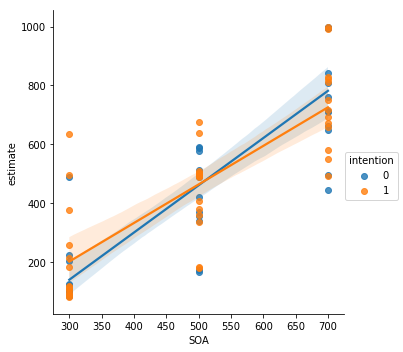

In [111]:
print ('plot of delay 2 of participant 2 (incontingent condition)\nintended outcome=1\nunintended outcome=0')
Gpp2delay1=sns.lmplot(x="SOA", y="estimate", hue="intention",truncate=True, size=5, data=pp2delay2)